# Junglee Rummy Data Analysis

## Introduction:

Game - www.jungleerummy.com

In Rummy Game, we have a variant 101 Pool Games, that is available for users to play online.

This is just one of the 4 variants that is available. This 101 Pool Games have different ‘Entry Fee’
(the money the user pays to play the game). Say 3 users A,B,C are playing the game with Entry
Fees of INR 10. All users will pay a certain Cut% to Junglee Games for the gaming experience.

This cut% varies according to Entry Fees. Let us say this cut% for Entry Fees of INR 10 is 15%.

All users will pay INR 1.5 each (INR 4.5 is the rake / revenue for the company) and the
remaining INR 8.5 from each user goes into the final pot that is available as the winnings
amount. Ultimately a single user wins. If B wins, then (s)he wins INR 25.5 with a net winning of
INR 15.5 (25.5 minus 10). Other users have a net losses of INR 10 each.

## Dataset Description:

1. Entry Fee: This is the Buy-in (money user pays) in rupees to enter the game
2. Seat: Max number of players that can sit on the table i.e. 2,6 for the data set
3. Composition: Actual number of players that actually joined the table
4. Date: It's a data set of 1st July 2018 to 30 Sep 2018 which gives daily data for each table
configuration
5. Configuration: Defined as the combination of Entry Fees – Seats – Composition
6. Cut %: %age amount deducted for each game from each user
7. '#Users': Distinct count of players (unique players) who played at least 1 game for table
configurationfor the date
8. User Cash Game Count: Total number of games played by users on table configuration
for the date. If user A,B,C play together a single game, then the value will be 3
9. Rake: Total amount generated in revenue from a table configuration for the date
10. Wager: Total amount paid by the users in terms of Entry Fees to play the game

## Loading Data:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# reading the data using pandas
df = pd.read_excel('BI Skill Test - Data Set.xlsx') 

In [3]:
# There are total of 14161 rows and 9 columns
df.shape

(14161, 9)

## Exploratory Data Analysis:

In [4]:
df.head()

,Date,Entry Fee,Seat,Composition,Cut %,# Users,User Cash Game Count,Rake,Wager
0,"July 1, 2018",10,2,2,0.15,198,593,889.5,5930
1,"July 1, 2018",10,6,2,0.15,347,560,840.0,5600
2,"July 1, 2018",10,6,3,0.15,568,1029,1543.5,10290
3,"July 1, 2018",10,6,4,0.15,584,1035,1552.5,10350
4,"July 1, 2018",10,6,5,0.15,592,1065,1597.5,10650


In [5]:
# Multiplying cut% with 100 to make it easy for computation
df['Cut %'] = df['Cut %'] * 100

### Basic Stats:

In [6]:
# Basic statistics of tha data
pd.options.display.float_format = '{:.0f}'.format
df.describe()

,Entry Fee,Seat,Composition,Cut %,# Users,User Cash Game Count,Rake,Wager
count,14161,14161,14161,14161,14161,14161,14161,14161
mean,854,5,4,13,165,305,10137,106726
std,1675,2,1,2,173,306,19686,280970
min,5,2,2,6,2,2,9,60
25%,25,6,2,10,33,69,952,6950
50%,100,6,3,15,112,212,3195,24000
75%,1000,6,5,15,233,444,9900,78000
max,10000,6,6,15,1155,2256,271200,4520000


<b>Observation:</b>
1. <b>Entry Fee:</b>Average entry fee is Rs.854, minimum entry fee is Rs 5 and maximum entry fee is Rs 10000. Most of the time users pay Rs 100 as a entry fee to play the game. 
2. <b>Seat:</b> Average number of players sit together is 5, out of them 4 play in average. Whereas 6 number of players play at max.
3. <b>Cut%:</b> Average cut % is 13%. Most of the players pay 15% as cut.
4. <b>#Users:</b> Average number of user played at least one game per day is 165 whereas maximum number of users played at least one game per day is 1155.
5. <b>Rake: </b>Average amount company earn per day is Rs 10137. Maximum amount company earned in a day is Rs 271200. Most of the time company earns Rs 3195.
6. <b>Wager:</b> Maximum amount players invested to play game is Rs 4520000, whereas most of the time users pay Rs 24000


C:\Users\Shamim Ahmed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Total amount paid by the users in terms of Entry Fees to play the game')

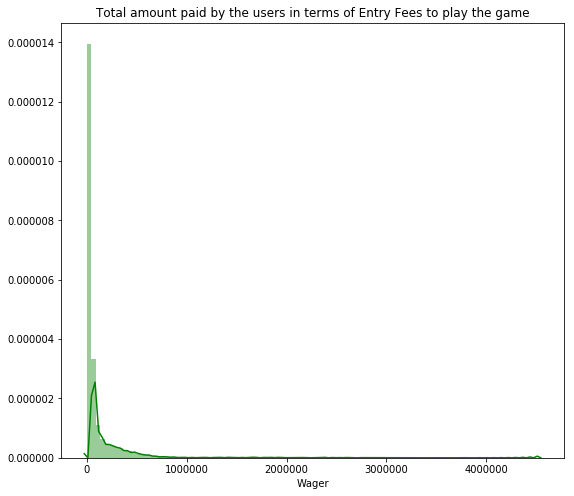

In [7]:
plt.figure(figsize=(9, 8))
sns.distplot(df['Wager'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title("Total amount paid by the users in terms of Entry Fees to play the game")

By the graph we observe that most of the time users pay around Rs 25000 in a particular day. 

C:\Users\Shamim Ahmed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Total amount generated in revenue from a table configuration for the date')

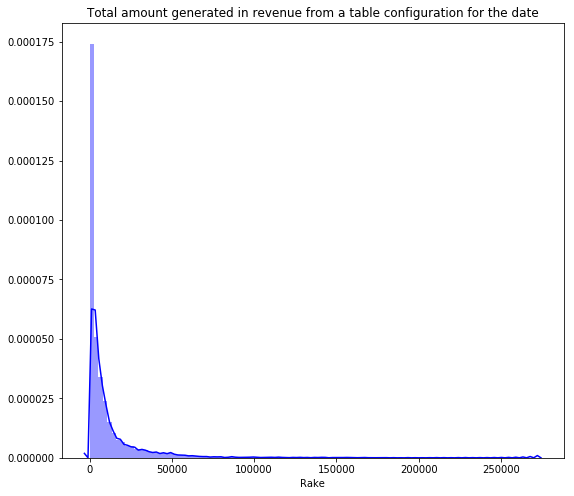

In [8]:
plt.figure(figsize=(9, 8))
sns.distplot(df['Rake'], color='b', bins=100, hist_kws={'alpha': 0.4})
plt.title("Total amount generated in revenue from a table configuration for the date")

By the graph it is clearly visible that most of the time company earns aroung Rs 3000 per day as mentioned above. 

### Time series analysis:

In [9]:
# introducing datetime
from datetime import datetime, date, time
datetime.strptime('July 1, 2018', '%B %d, %Y')

datetime.datetime(2018, 7, 1, 0, 0)

In [10]:
# converting date to datetime format
date = []
for d in df['Date']:
    x = datetime.strptime(d, '%B %d, %Y')
    date.append(x)
df['my_date'] = date

In [11]:
df.head()

,Date,Entry Fee,Seat,Composition,Cut %,# Users,User Cash Game Count,Rake,Wager,my_date
0,"July 1, 2018",10,2,2,15,198,593,890,5930,2018-07-01
1,"July 1, 2018",10,6,2,15,347,560,840,5600,2018-07-01
2,"July 1, 2018",10,6,3,15,568,1029,1544,10290,2018-07-01
3,"July 1, 2018",10,6,4,15,584,1035,1552,10350,2018-07-01
4,"July 1, 2018",10,6,5,15,592,1065,1598,10650,2018-07-01


In [12]:
print(df['my_date'][0].month)
print(df['my_date'][0].day)
print(df['my_date'][0].year)

7
1
2018


In [13]:
# converting datetime to individual columns
day = []
month = []
year = []
for i in df['my_date']:
    day.append(i.day)
    month.append(i.month)
    year.append(i.year)

In [14]:
df['day'] = day
df['month'] = month
df['year'] = year

In [15]:
df.head(2)

,Date,Entry Fee,Seat,Composition,Cut %,# Users,User Cash Game Count,Rake,Wager,my_date,day,month,year
0,"July 1, 2018",10,2,2,15,198,593,890,5930,2018-07-01,1,7,2018
1,"July 1, 2018",10,6,2,15,347,560,840,5600,2018-07-01,1,7,2018


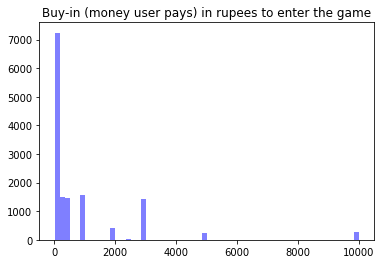

In [16]:
num_bins = 60
plt.hist(df['Entry Fee'], num_bins, facecolor='blue', alpha=0.5)
plt.title("Buy-in (money user pays) in rupees to enter the game")
plt.show()

We observe that most of the people buy tickets less than 1000 Rs. There are some users who spend Rs 10000 as an enrty fees to play the game.

month
1    1796
2    1597
3    1723
4    1676
5    1432
6    1596
7    1502
8    1516
9    1323
dtype: int64


Text(0.5,1,'Monthly sales analysis')

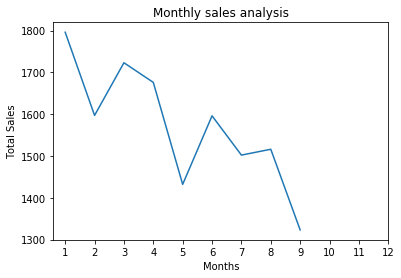

In [17]:
# sale by month
sales_by_month = df.groupby('month').size()
print(sales_by_month)
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Monthly Sales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Sales')
plt.title("Monthly sales analysis")

It is observed that number of sales in the month of January is high as compared to other months. As the months progressed the number of sales decreased. 

Text(0.5,1,'Daily sales analysis')

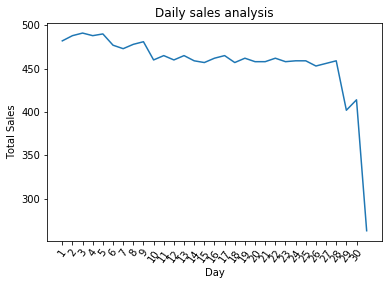

In [18]:
#Sale by Day

sales_by_day = df.groupby('day').size()
plot_by_day = sales_by_day.plot(title='Daily Sales',xticks=(range(1,31)),rot=55)
plot_by_day.set_xlabel('Day')
plot_by_day.set_ylabel('Total Sales')
plt.title("Daily sales analysis")

We observe that number of sales in the first five days of the month is high as compared to other months.

In [78]:
# could have been better if i could get hourly data.

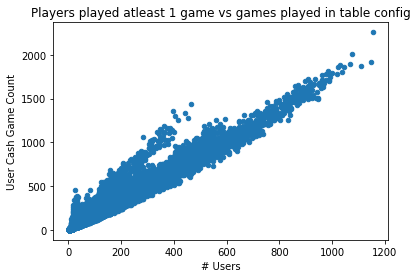

In [19]:
df.plot(kind='scatter', x='# Users', y='User Cash Game Count');
plt.title("Players played atleast 1 game vs games played in table config")
plt.show()

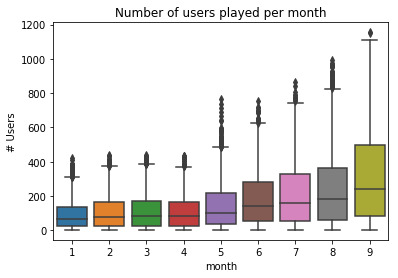

In [20]:
# number of users played per month
sns.boxplot(x='month', y='# Users', data=df)
plt.title("Number of users played per month")
plt.show()

As the time progressed the number of users per month increased gradually. If we focus on the quantiles, in january there were around 100 people in average per day. But there were around 400 at maximum. In the month of september there were around 220 users in an average per day whereas there were around 1200 user per day. Same can be understood for other months as well.

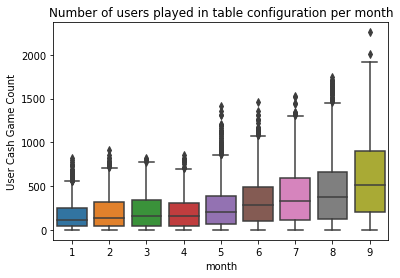

In [21]:
# Number of users played in table configuration per month.

sns.boxplot(x='month', y='User Cash Game Count', data=df)
plt.title("Number of users played in table configuration per month")
plt.show()

Similarly if we focus on number of games played per month on table, in january around 100 people played in a day wheras at max 800 people in a day. We observed that there was a slight decrease in number of games played in the month of april. In the month of september in an average 500 people played on table whereas at max 3000 people played on table, 75% time 900 played game on table. 

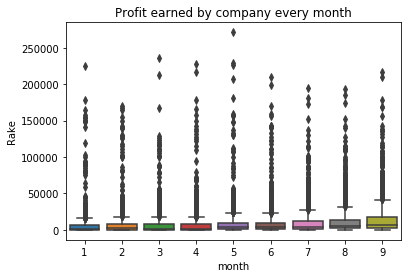

In [22]:
# Profit earned by company every month

sns.boxplot(x='month', y='Rake', data=df)
plt.title("Profit earned by company every month")
plt.show()

If we observe the boxplot, company earned most of the profit in the month of september in an average. We also see that maximum profit earned at a time is around 300000 in the month of may. In the month of february company earned least revenue. 

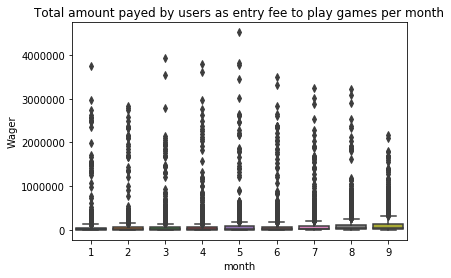

In [24]:
# total amount payed by users as entry fee to play games per month.

sns.boxplot(x='month', y='Wager', data=df)
plt.title("Total amount payed by users as entry fee to play games per month")
plt.show()

We observed that same scenerio is observed as above RAGE plots. In the month of may maximum amount is spent by user to play a game. In an average september has a good recored. 

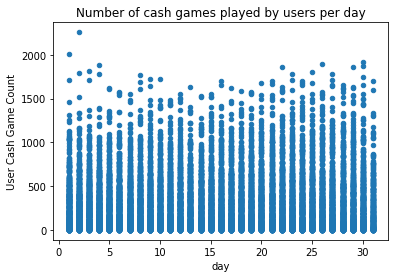

In [25]:
# analysis by days of the month 
# number of cash games played by users per day. 
plt.figure(figsize=(20,18))
df.plot(kind='scatter', x='day', y='User Cash Game Count');
plt.title("Number of cash games played by users per day")
plt.show()

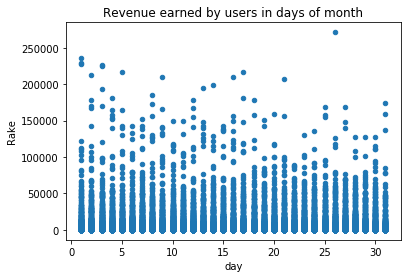

In [26]:
# Revenue earned by users in days of month

df.plot(kind='scatter', x='day', y='Rake');
plt.title("Revenue earned by users in days of month")
plt.show()

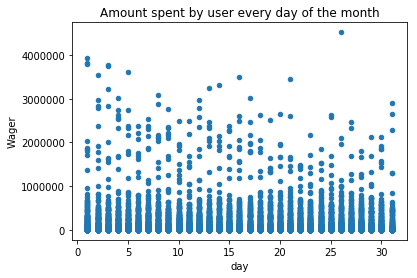

In [27]:
# Amount spent by user every day of the month.

df.plot(kind='scatter', x='day', y='Wager');
plt.title("Amount spent by user every day of the month")
plt.show()

# Conclusion and Observation:

1. Entry Fee: Firstly, maximum number of people spend 100 Rs to enter the game.
2. Seat: At maximum 6 players can sit on a table, among them 3 players plays most of the time.
3. Cut%: In most cases 15% of the amount is deducted per user.
4. No of Users: In a day 112 players play atleast a table game per day mostly. 
5. User cash game: In most cases 212 players play table game in a day. 
6. Rake: Per day company earns Rs 3195 in an average.
7. Wager: Per day users spends Rs 24000 in an average. 
8. We observed that most of the users pay less than Rs 1000 to play a game.
9. It is observed that the number of sales in the month of January is high as compared to other months. As the months progressed the number of sales decreased.
10. We observe that number of sales in the first five days of the month is high as compared to other months.
11. We observe that number of users gradually increased as the days progressed. But May month had significant high user engagement from preceeding months. 
12. We see that May month had very high revenue generation by the company. 
13. We had observed that every day of the month shown uniform revenue generation by the company.
14. Overall we observed that month of May had been best for the company's profitability. It had shown significant growth in the same. Whereas month of february was little bit odd for the company in terms profitability. 

## Recomendations:

1. "Scope of user engagement" We should target people with low income with advertisements, email marketing, etc. 
2. We can introduce more games with Rs. 100 price bracket since most of the times users pays Rs. 100 as entry fees.
3. We can introduce rewards(like lives, tokens, etc) to the players to complete the game. It would reduce the number of players leaving the game in the middle. 
4. Months of January, June, July, December (whose data not provided in the dataset) are holiday periods. We can increase marketing, sales offer, discounts in those months.
5. People get their wages, salaries in the initial days of the month. So they tend to spend more. We must target users in those days. 
